# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/trip_records')

  # Create a list of all the twelve files to read
file_list = os.listdir()

  # initialise an empty dataframe
df = pd.DataFrame()


  # iterate through the list of files and sample one by one:
for  file_name in file_list:
      try:
          # file path for the current file
          file_path = os.path.join(os.getcwd(), file_name)

          # Reading the current file
          df_month = pd.read_parquet(file_path)

          # Ensure datetime column is present
          if 'tpep_pickup_datetime' not in df_month.columns:
              raise ValueError(f"'tpep_pickup_datetime' column not found in {file_name}")

          # Convert to datetime format if not already
          df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

          # Extract 'date' and 'hour' from 'tpep_pickup_datetime'
          df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
          df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

          # Initialize a temporary dataframe for the sampled data of this month
          newsample = pd.DataFrame()

          # Loop through each unique date
          for date in df_month['date'].unique():
              df_day = df_month[df_month['date'] == date]

              # Loop through each hour (0 to 23)
              for hour in range(24):
                  hour_data = df_day[df_day['hour'] == hour]

                  if not hour_data.empty:
                      # Sample 5% of the data for this hour
                      sample = hour_data.sample(frac=0.05, random_state=42)

                      # Append the sampled data to sampled_data dataframe
                      newsample = pd.concat([newsample, sample], ignore_index=True)

          # After processing all dates and hours of the current month, add to the final dataframe
          df = pd.concat([df, newsample], ignore_index=True)

          print(f"Completed sampling for file: {file_name}")

      except Exception as e:
          print(f"Error reading file {file_name}: {e}")
  # Now 'df' will have the combined sampled data for the entire year
print(f"Final sampled data shape: {df.shape}")

Completed sampling for file: 2023-9.parquet
Completed sampling for file: 2023-5.parquet
Completed sampling for file: 2023-6.parquet
Completed sampling for file: 2023-2.parquet
Completed sampling for file: 2023-1.parquet
Completed sampling for file: 2023-8.parquet
Completed sampling for file: 2023-7.parquet
Completed sampling for file: 2023-10.parquet
Completed sampling for file: 2023-3.parquet
Completed sampling for file: 2023-12.parquet
Completed sampling for file: 2023-4.parquet
Completed sampling for file: 2023-11.parquet
Error reading file newsample.parquet: [Errno 2] No such file or directory: '/content/drive/MyDrive/trip_records/newsample.parquet'
Final sampled data shape: (1896400, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/trip_records/newsample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df.to_parquet('/content/drive/MyDrive/trip_records/newsample.parquet')


In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN               None           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             0  ...      0.5        4.32          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour airport_fee  
0  2023-09-01     0         NaN  
1  2023-09-01     0         NaN  
2  2023-09-01     0         NaN  
3  2023-09-01     0         NaN  
4  2023-09-01     0         NaN  

[5 rows x 22 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
### Combine the two airport fee columns

# Calculate the median of airport fee and Airport fee

median_airportfee = df['airport_fee'].median()
df['airport_fee'] = df['airport_fee'].fillna(median_airportfee)

median_AirportFee = df['Airport_fee'].median()
df['Airport_fee'] = df['Airport_fee'].fillna(median_AirportFee)


# Combine the two airport fees and drop Airport fee
df['airport_fee'] = df['airport_fee'] + df['Airport_fee']
df.drop(columns = ['Airport_fee'], inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
negative_fareamt = df[df['fare_amount']<0]
negative_fareamt


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].unique()



array([nan,  1.,  2.,  4.,  5.,  3., 99.,  6.])

In [16]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include = np.number).columns[(df.select_dtypes(include = np.number)<0).any()]
print ("Columns that have negative values" , negative_columns.tolist())

Columns that have negative values ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [17]:
# fix these negative values
for column in negative_columns:
  df[column] = df[column].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df)
print("Proportion of missing values in each column:\n", missing_values)


Proportion of missing values in each column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
date                     0.000000
hour                     0.000000
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df['passenger_count'].isnull().sum()
df['passenger_count'].fillna(1, inplace=True)
df['passenger_count']


0          1.0
1          2.0
2          2.0
3          2.0
4          1.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    1.0
Name: passenger_count, Length: 1896400, dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [20]:
df['passenger_count'].unique()

array([1., 2., 5., 4., 6., 3., 0., 8., 7., 9.])

In [21]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [22]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].unique()

array([nan,  1.,  2.,  4.,  5.,  3., 99.,  6.])

In [23]:
df['RatecodeID'].fillna(1, inplace=True)
df['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5.,  3., 99.,  6.])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [24]:
# handle null values in congestion_surcharge

median_Congestionsurcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(median_Congestionsurcharge)
df.congestion_surcharge


0          2.5
1          2.5
2          2.5
3          2.5
4          2.5
          ... 
1896395    2.5
1896396    2.5
1896397    2.5
1896398    2.5
1896399    2.5
Name: congestion_surcharge, Length: 1896400, dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Handle any remaining missing values
df.isnull().any()


VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
date                     False
hour                     False
airport_fee              False
dtype: bool

In [26]:
# store_and_fwd_flag is a object with Y, N and None. Use the most frequent value to fill NA
mof_storefwdflag = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(mof_storefwdflag, inplace=True)
df['store_and_fwd_flag'].unique()

array([None], dtype=object)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930794  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644038e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge          hour   airport_fee  
count          1.896400e+06  1.896400e+06  1.896400e+06  
mean           2.314256e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.556359e-01  5.807381e+00  4.575819e-01

<Axes: xlabel='fare_amount'>

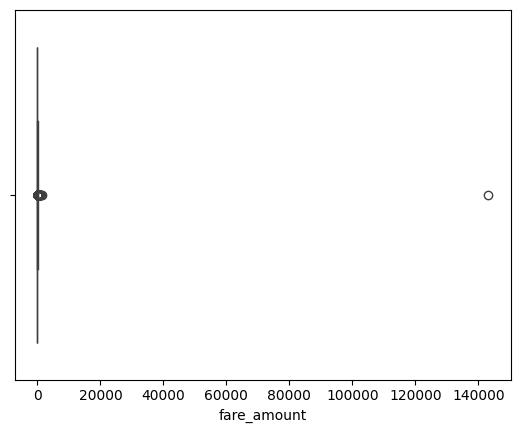

In [28]:
sns.boxplot(x=df['fare_amount'])


<Axes: xlabel='passenger_count'>

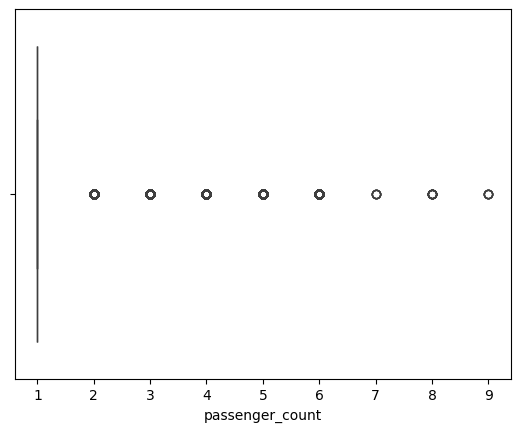

In [29]:
sns.boxplot(x=df['passenger_count'])

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [30]:
# remove passenger_count > 6
df= df[df['passenger_count']<6]
df['passenger_count'].unique()


array([1., 2., 5., 4., 3.])

In [31]:
# Continue with outlier handling
# Removing Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]



In [32]:
# Removing Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


In [33]:
# Removing Entries where trip_distance is more than 250 miles.
df = df[df['trip_distance'] <= 250]

In [34]:
# Removing Entries where payment_type is 0
df = df[df['payment_type'] != 0]

In [35]:
# Do any columns need standardising?

from sklearn.preprocessing import MinMaxScaler

#Select the numerical columns to be standardized
numerical_cols = ['fare_amount', 'total_amount', 'RatecodeID', 'mta_tax', 'congestion_surcharge']  # Add other columns as needed

#Create a MinMaxScaler object
scaler = MinMaxScaler()

#Fit the scaler on the selected columns and transform them
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

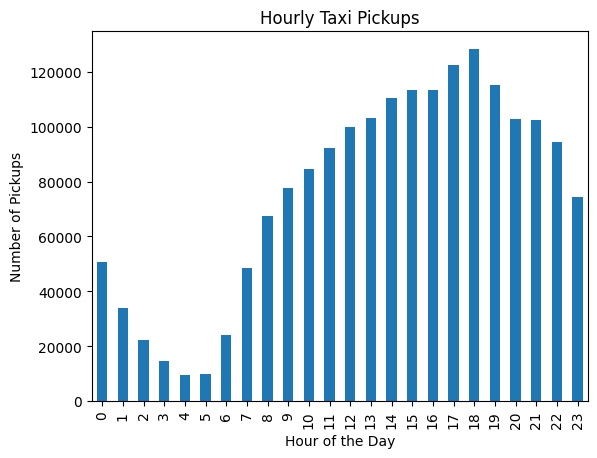

In [37]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df.groupby(df['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
hourly_pickups.plot(kind='bar')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()


Text(0, 0.5, 'Number of Pickups')

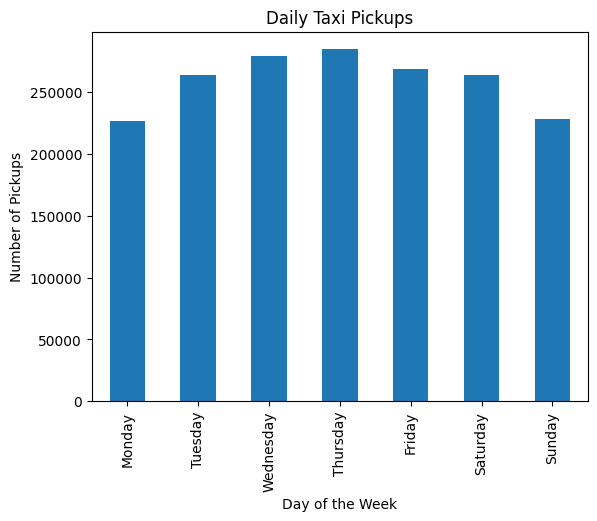

In [38]:
# Find and show the daily trends in taxi pickups (days of the week)

daily_pickups = df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['VendorID'].count()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_pickups.index = days  # Replace day numbers with day names

daily_pickups.plot(kind='bar')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')

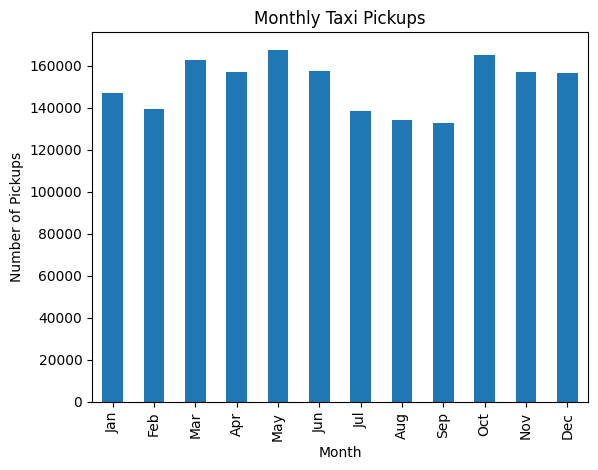

In [39]:
# Show the monthly trends in pickups

monthly_pickups = df.groupby(df['tpep_pickup_datetime'].dt.month)['VendorID'].count()
monthly_pickups.plot(kind='bar')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
print('Negative values in fare amount',len(df[df['fare_amount']<=0]))
print('Negative values in tip amount',len(df[df['tip_amount']<=0]))
print('Negative values in total amount',len(df[df['total_amount']<=0]))
print('Negative values in trip distance',len(df[df['trip_distance']<=0]))



Negative values in fare amount 572
Negative values in tip amount 406828
Negative values in total amount 253
Negative values in trip distance 22858


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [41]:
# Create a df with non zero entries for the selected parameters.
df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    ((df['trip_distance'] > 0) | (df['PULocationID'] == df['DOLocationID']))  # Keep if distance > 0 OR pickup and dropoff are the same
]
df_filtered


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
4               2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
5               2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   
6               2  2023-09-01 00:07:47   2023-09-01 00:18:46              1.0   
7               2  2023-09-01 00:46:19   2023-09-01 01:00:11              1.0   
...           ...                  ...                   ...              ...   
1896393         2  2023-11-30 23:27:36   2023-11-30 23:36:30              1.0   
1896394         2  2023-11-30 23:20:04   2023-11-30 23:30:14              1.0   
1896396         2  2023-11-30 23:21:56   2023-11-30 23:36:27              1.0   
1896397         1  2023-11-30 23:59:24   2023-12-01 00:05:48              1.0   
1896399         2  2023-11-30 23:57:51   2023-12-01 00:03:42              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2                18.46    0.010204               None           132   
4                 0.71    0.000000               None           144   
5                 4.39    0.000000               None            79   
6                 1.76    0.000000               None            48   
7                 6.32    0.000000               None           233   
...                ...         ...                ...           ...   
1896393           1.12    0.000000               None           170   
1896394           2.10    0.000000               None            48   
1896396           8.59    0.000000               None           138   
1896397           1.50    0.000000               None           107   
1896399           2.52    0.000000               None            75   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
2                 163             1  ...    0.0    0.125       15.71   
4                 232             1  ...    1.0    0.125        2.00   
5                 263             1  ...    1.0    0.125        4.82   
6                 143             1  ...    1.0    0.125        3.42   
7                  33             1  ...    1.0    0.125        6.22   
...               ...           ...  ...    ...      ...         ...   
1896393           230             1  ...    1.0    0.125        3.00   
1896394           238             1  ...    1.0    0.125        3.00   
1896396           262             1  ...    6.0    0.125       10.15   
1896397           186             1  ...    2.5    0.125        3.80   
1896399           141             1  ...    1.0    0.125        3.28   

         tolls_amount  improvement_surcharge  total_amount  \
2                6.94                    1.0      0.000687   
4                0.00                    1.0      0.000104   
5                0.00                    1.0      0.000202   
6                0.00                    1.0      0.000143   
7                0.00                    1.0      0.000261   
...               ...                    ...           ...   
1896393          0.00                    1.0      0.000126   
1896394          0.00                    1.0      0.000140   
1896396          6.94                    1.0      0.000438   
1896397          0.00                    1.0      0.000115   
1896399          0.00                    1.0      0.000137   

         congestion_surcharge        date hour  airport_fee  
2                         1.0  2023-09-01    0         1.75  
4                         1.0  2023-09-01    0         0.00  
5                         1.0  2023-09-01    0         0.00  
6                         1.0  2023-09-01    0         0.00  
7                         1.0  2023-09-01    0         0.00  
...                       ...         ...  ...          ...  
1896393                   1.0  2023-11-30   23         0.00  
1896394                   1.0  2023-11-30   23         0.00  
1896396        

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [42]:
# Group data by month and analyse monthly revenue
df['month'] = df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby('month')['total_amount'].sum()
print(monthly_revenue)


month
1     28.065021
2     26.514190
3     32.027603
4     31.463983
5     34.251192
6     32.224721
7     28.045236
8     27.359066
9     28.902453
10    34.360732
11    31.991392
12    31.898382
Name: total_amount, dtype: float64


Text(0.5, 1.0, 'Monthly Revenue')

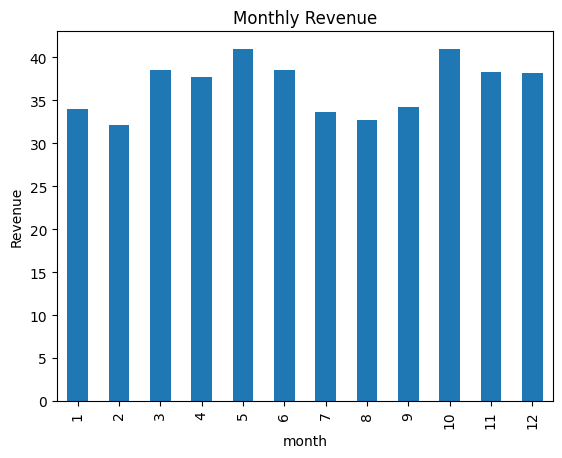

In [106]:
monthly_revenue.plot(kind='bar')
plt.ylabel ('Revenue')
plt.title('Monthly Revenue')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [43]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
print(quarterly_revenue)



quarter
1    86.606814
2    97.939896
3    84.306755
4    98.250506
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

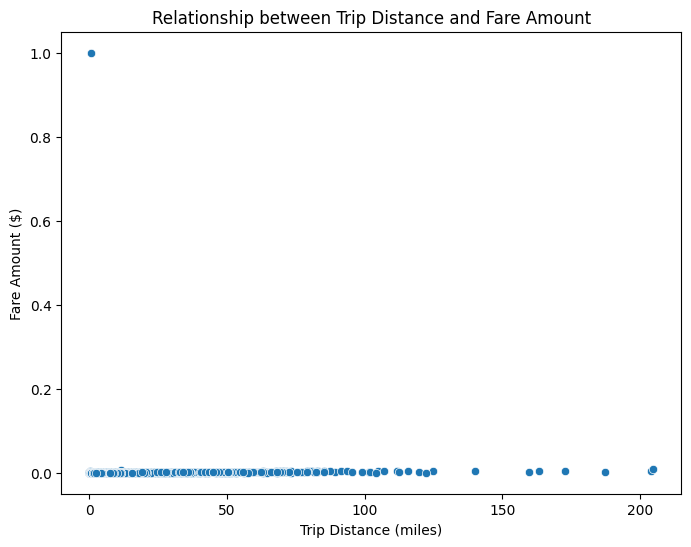

Correlation between trip distance and fare amount: 0.15565479590713613


In [44]:
# Show how trip fare is affected by distance
# Filter out trips with trip_distance = 0
filtered_df = df[df['trip_distance'] > 0]

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate the correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [45]:
# Show relationship between fare and trip duration
#trip duration calculated by the pickup time and dropoff time
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60


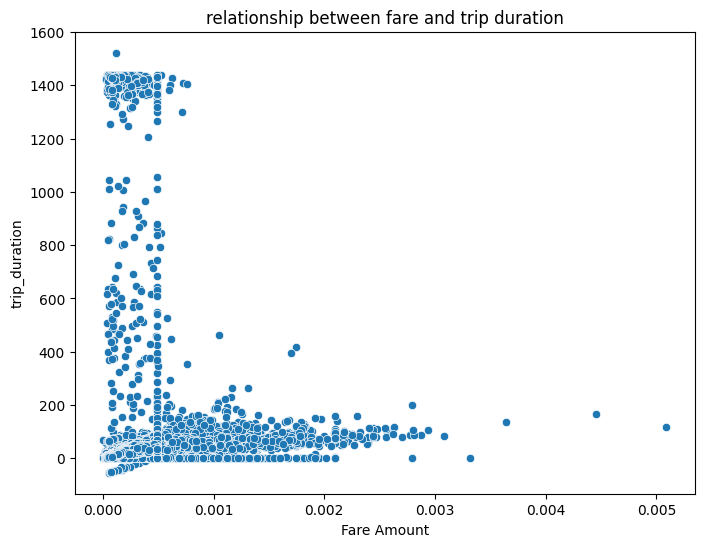

Correlation between fare and trip duration: 0.3243719034742646


In [46]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare_amount', y='trip_duration', data=df_filtered)
plt.title('relationship between fare and trip duration')
plt.xlabel('Fare Amount')
plt.ylabel('trip_duration')
plt.show()

# Calculate the correlation
correlation = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between fare and trip duration: {correlation}")

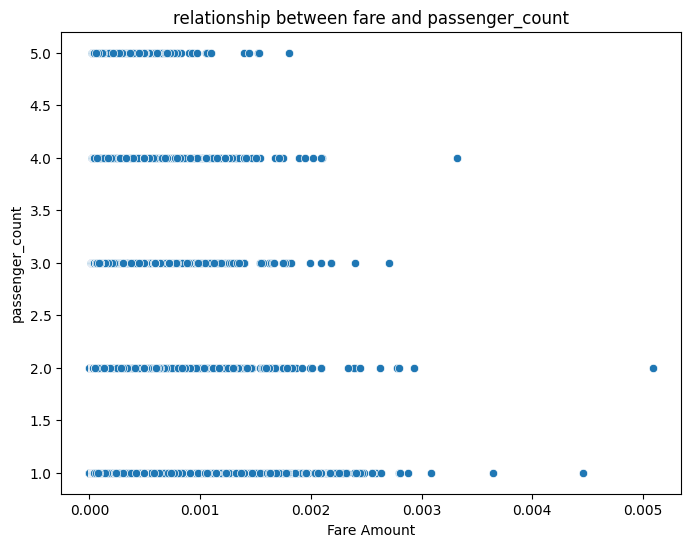

Correlation between fare and passenger_count: 0.048667300601610355


In [47]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare_amount', y='passenger_count', data=df_filtered)
plt.title('relationship between fare and passenger_count')
plt.xlabel('Fare Amount')
plt.ylabel('passenger_count')
plt.show()

# Calculate the correlation
correlation = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
print(f"Correlation between fare and passenger_count: {correlation}")

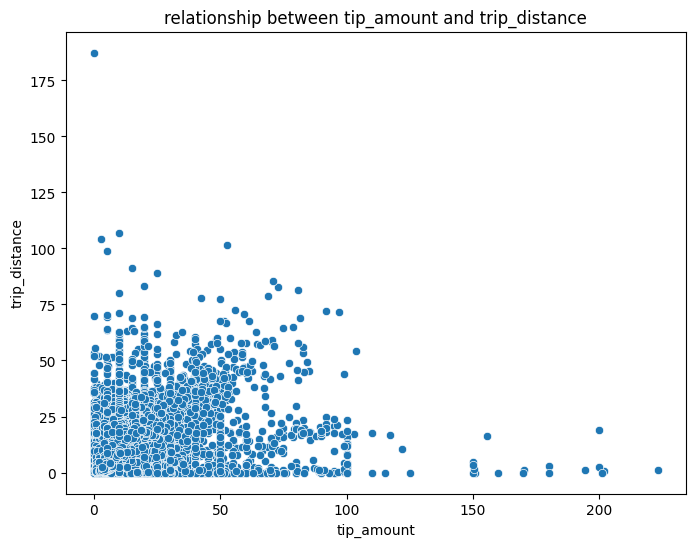

Correlation between tip_amount and trip_distance: 0.7778510846351464


In [48]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tip_amount', y='trip_distance', data=df_filtered)
plt.title('relationship between tip_amount and trip_distance')
plt.xlabel('tip_amount')
plt.ylabel('trip_distance')
plt.show()

# Calculate the correlation
correlation = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: xlabel='payment_type'>

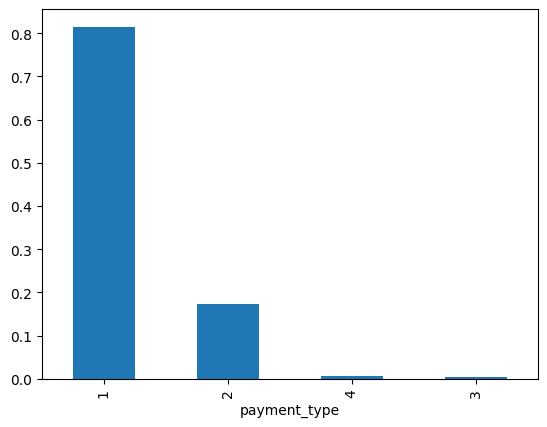

In [49]:
# Analyse the distribution of different payment types (payment_type).

paymenttype_dist=df['payment_type'].value_counts(normalize=True)
paymenttype_dist

paymenttype_dist.plot(kind='bar')


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [124]:
!pip install geopandas

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [51]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/taxi_zones')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

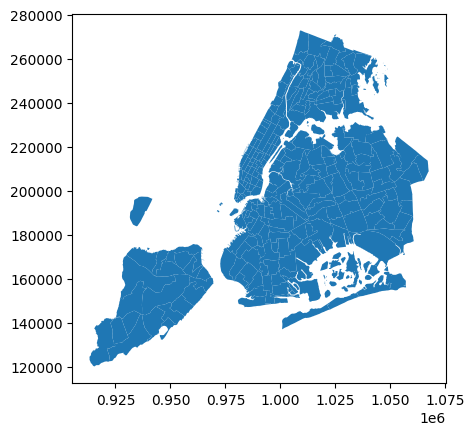

In [52]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [53]:
# Merge zones and trip records using locationID and PULocationID

merged_data = pd.merge(df_filtered, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
1               2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
2               2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   
3               2  2023-09-01 00:07:47   2023-09-01 00:18:46              1.0   
4               2  2023-09-01 00:46:19   2023-09-01 01:00:11              1.0   
...           ...                  ...                   ...              ...   
1405818         2  2023-11-30 23:27:36   2023-11-30 23:36:30              1.0   
1405819         2  2023-11-30 23:20:04   2023-11-30 23:30:14              1.0   
1405820         2  2023-11-30 23:21:56   2023-11-30 23:36:27              1.0   
1405821         1  2023-11-30 23:59:24   2023-12-01 00:05:48              1.0   
1405822         2  2023-11-30 23:57:51   2023-12-01 00:03:42              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                18.46    0.010204               None           132   
1                 0.71    0.000000               None           144   
2                 4.39    0.000000               None            79   
3                 1.76    0.000000               None            48   
4                 6.32    0.000000               None           233   
...                ...         ...                ...           ...   
1405818           1.12    0.000000               None           170   
1405819           2.10    0.000000               None            48   
1405820           8.59    0.000000               None           138   
1405821           1.50    0.000000               None           107   
1405822           2.52    0.000000               None            75   

         DOLocationID  payment_type  ...  hour  airport_fee  trip_duration  \
0                 163             1  ...     0         1.75      44.583333   
1                 232             1  ...     0         0.00       6.300000   
2                 263             1  ...     0         0.00      13.416667   
3                 143             1  ...     0         0.00      10.983333   
4                  33             1  ...     0         0.00      13.866667   
...               ...           ...  ...   ...          ...            ...   
1405818           230             1  ...    23         0.00       8.900000   
1405819           238             1  ...    23         0.00      10.166667   
1405820           262             1  ...    23         1.75      14.516667   
1405821           186             1  ...    23         0.00       6.400000   
1405822           141             1  ...    23         0.00       5.850000   

         OBJECTID  Shape_Leng  Shape_Area                 zone  LocationID  \
0           132.0    0.245479    0.002038          JFK Airport       132.0   
1           144.0    0.027620    0.000047  Little Italy/NoLiTa       144.0   
2            79.0    0.042625    0.000108         East Village        79.0   
3            48.0    0.043747    0.000094         Clinton East        48.0   
4           233.0    0.048036    0.000116  UN/Turtle Bay South       233.0   
...           ...         ...         ...                  ...         ...   
1405818     170.0    0.045769    0.000074          Murray Hill       170.0   
1405819      48.0    0.043747    0.000094         Clinton East        48.0   
1405820     138.0    0.107467    0.000537    LaGuardia Airport       138.0   
1405821     107.0    0.038041    0.000075             Gramercy       107.0   
1405822      75.0    0.087664    0.000241    East Harlem South        75.0   

           borough                                           geometry  
0           Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
1        Manhattan  POLYGON ((985411.76 200369.518, 985342.573 200...  
2        Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
3        Manhattan  P

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [54]:
# Group data by location and calculate the number of trips
trips_by_location = merged_data.groupby('LocationID')['VendorID'].count()
trips_by_location


LocationID
1.0        119
2.0          2
4.0       1405
6.0          2
7.0        269
         ...  
259.0        2
260.0      107
261.0     6869
262.0    19157
263.0    27714
Name: VendorID, Length: 234, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [61]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_by_location.rename('num_trips'), left_on='LocationID', right_index=True, how='left')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  num_trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...      119.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        NaN  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...     1405.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        NaN

In [62]:
zones['num_trips'].fillna(0,inplace=True)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  num_trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...      119.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        0.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...     1405.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

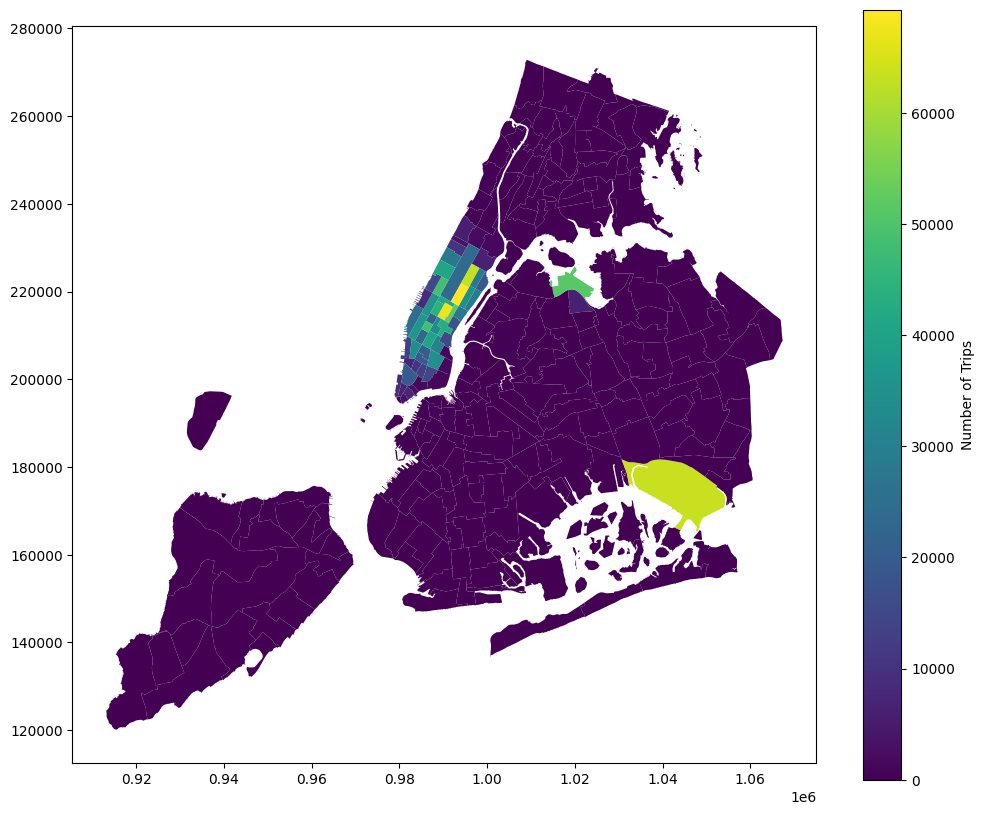

In [63]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(
  column = 'num_trips',
  ax = ax,
  legend = True,
  legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"}
)


In [64]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by=['num_trips'], ascending=False)
display(zones_sorted)

OBJECTID  Shape_Leng  Shape_Area                                 zone  \
236       237    0.042213    0.000096                Upper East Side South   
160       161    0.035804    0.000072                       Midtown Center   
131       132    0.245479    0.002038                          JFK Airport   
235       236    0.044252    0.000103                Upper East Side North   
161       162    0.035270    0.000048                         Midtown East   
..        ...         ...         ...                                  ...   
220       221    0.166218    0.000890                            Stapleton   
29         30    0.094510    0.000146                        Broad Channel   
26         27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
244       245    0.095983    0.000466                        West Brighton   
2           3    0.084341    0.000314              Allerton/Pelham Gardens   

     LocationID        borough  \
236         237      Manhattan   
160         161      Manhattan   
131         132         Queens   
235         236      Manhattan   
161         162      Manhattan   
..          ...            ...   
220         221  Staten Island   
29           30         Queens   
26           27         Queens   
244         245  Staten Island   
2             3          Bronx   

                                              geometry  num_trips  
236  POLYGON ((993633.442 216961.016, 993507.232 21...    69301.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...    67273.0  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...    63537.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...    63200.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...    52328.0  
..                                                 ...        ...  
220  POLYGON ((963349.728 171627.581, 963397.759 17...        0.0  
29   POLYGON ((1034013.272 163473.152, 1034866.459 ...        0.0  
26   POLYGON ((1021692.969 147138.664, 1021883.624 ...        0.0  
244  POLYGON ((957085.564 172591.26, 957142.385 172...        0.0  
2    POLYGON ((1026308.77 256767.698, 1026495.593 2...        0.0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


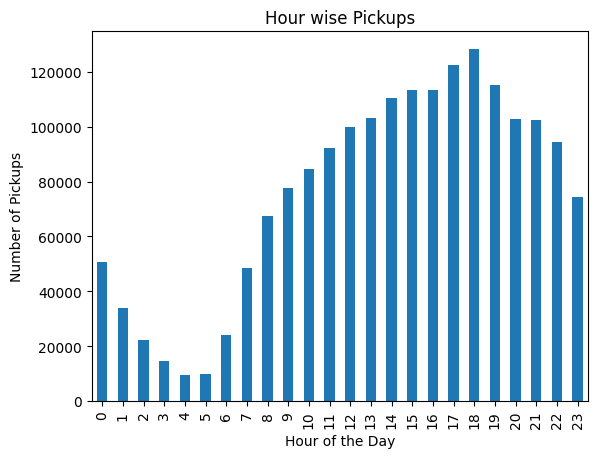

In [66]:
#Busiest hours, days and months
busiest_hours = df.groupby(df['hour'])['tpep_pickup_datetime'].count()
busiest_hours.plot(kind='bar')
plt.title('Hour wise Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

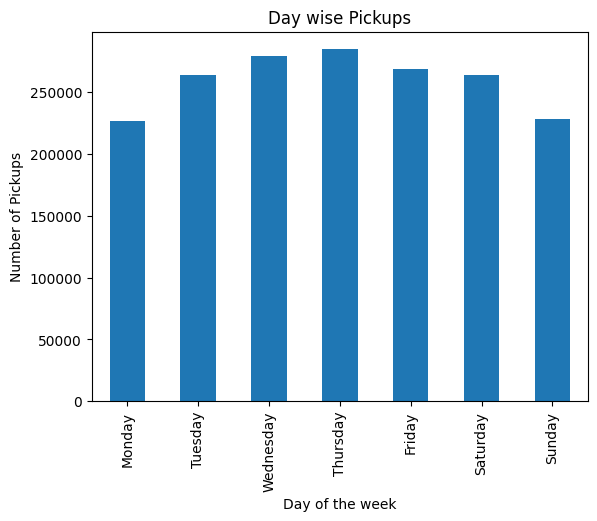

In [71]:
import calendar

busiest_days = df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['tpep_pickup_datetime'].count()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

busiest_days.index = days  # Replace day numbers with day names
busiest_days.plot(kind='bar')
plt.title('Day wise Pickups')
plt.xlabel('Day of the week')
plt.ylabel('Number of Pickups')
plt.show()

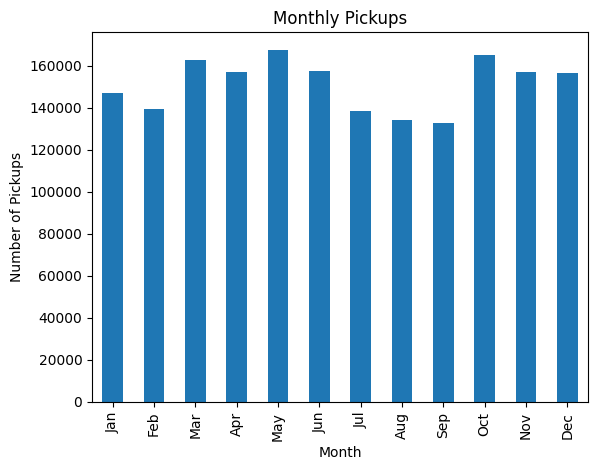

In [73]:
busiest_month = df.groupby(df['tpep_pickup_datetime'].dt.month)['tpep_pickup_datetime'].count()
busiest_month.plot(kind='bar')
plt.title('Monthly Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.show()

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [74]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in minutes
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove invalid durations
df_filtered = df_filtered[df_filtered['trip_duration'] > 0]

# Group by pickup and dropoff locations and hour of the day
grouped_data = df_filtered.groupby(['PULocationID', 'DOLocationID', df_filtered['tpep_pickup_datetime'].dt.hour])

# Calculate average trip duration and distance for each group
route_stats = grouped_data.agg({'trip_duration': 'mean', 'trip_distance': 'mean'})

# Calculate speed for each route and hour
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']

# Find the slowest routes
slowest_routes = route_stats.sort_values(by=['speed']).head(10)  # Get top 10 slowest routes

print("Slowest Routes:\n", slowest_routes)


Slowest Routes:
                                                 trip_duration  trip_distance  \
PULocationID DOLocationID tpep_pickup_datetime                                 
55           55           19                         0.300000            0.0   
216          216          22                         0.516667            0.0   
                          21                         0.100000            0.0   
146          146          8                          1.083333            0.0   
234          234          4                          0.383333            0.0   
70           70           5                          0.550000            0.0   
                          10                         7.866667            0.0   
189          189          2                          0.133333            0.0   
92           92           20                         0.166667            0.0   
127          127          12                         0.200000            0.0   

                      

How does identifying high-traffic, high-demand routes help us?

In [75]:
# Calculate trip frequency for each route
route_frequency = df_filtered.groupby(['PULocationID', 'DOLocationID'])['VendorID'].count().reset_index()
route_frequency.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# Identify high-traffic routes (top 10 based on trip count)
high_traffic_routes = route_frequency.sort_values(by=['trip_count'], ascending=False).head(10)

# Display high-traffic routes
print("High-Traffic Routes:\n", high_traffic_routes)

High-Traffic Routes:
        PULocationID  DOLocationID  trip_count
12026           264           264       10612
10463           237           236       10395
10292           236           237        8964
10291           236           236        6517
10464           237           237        6384
7019            161           237        4763
10414           237           161        4528
7018            161           236        4321
5896            142           239        4042
10704           239           142        3723


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

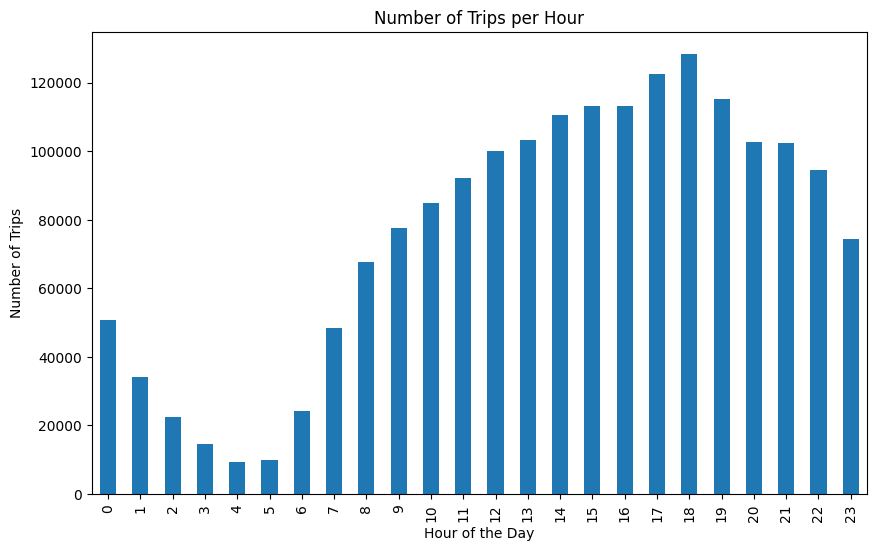

Busiest Hour: 18
Number of Trips during Busiest Hour: 128327


In [76]:
# Visualise the number of trips per hour and find the busiest hour

# Group data by pickup hour and count trips
trips_per_hour = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Visualize the distribution
trips_per_hour.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
trips_during_busiest_hour = trips_per_hour.max()

print(f"Busiest Hour: {busiest_hour}")
print(f"Number of Trips during Busiest Hour: {trips_during_busiest_hour}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [77]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Get the five busiest hours
busiest_hours = df_filtered['tpep_pickup_datetime'].dt.hour.value_counts().sort_values(ascending=False).head(5).index

# Calculate the actual number of trips for the busiest hours
actual_trips = []
for hour in busiest_hours:
    trips_in_hour = df_filtered[df_filtered['tpep_pickup_datetime'].dt.hour == hour]['VendorID'].count()
    actual_trips_in_hour = trips_in_hour / sample_fraction
    actual_trips.append((hour, actual_trips_in_hour))

# Display the results
print("Actual Number of Trips in the Five Busiest Hours:")
for hour, trips in actual_trips:
    print(f"Hour: {hour}, Estimated Trips: {trips}")



Actual Number of Trips in the Five Busiest Hours:
Hour: 18, Estimated Trips: 2053960.0
Hour: 17, Estimated Trips: 1930440.0
Hour: 19, Estimated Trips: 1846560.0
Hour: 16, Estimated Trips: 1728060.0
Hour: 15, Estimated Trips: 1704220.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

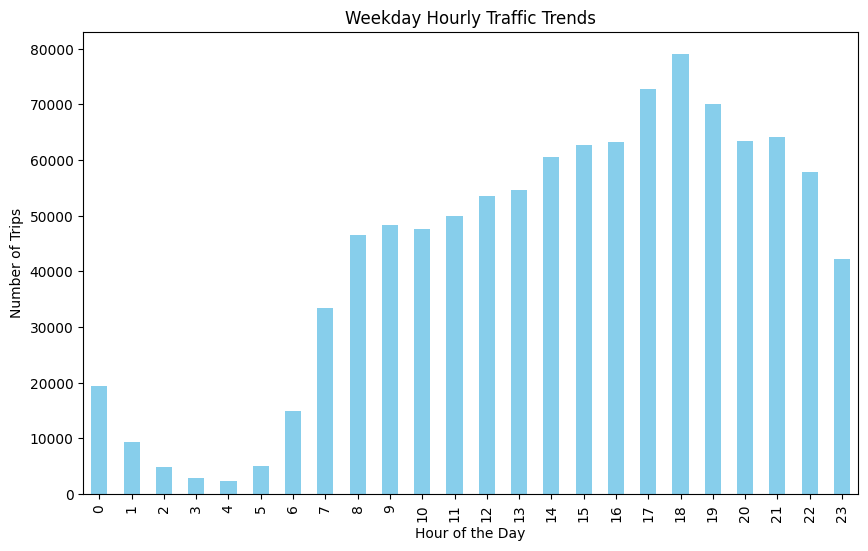

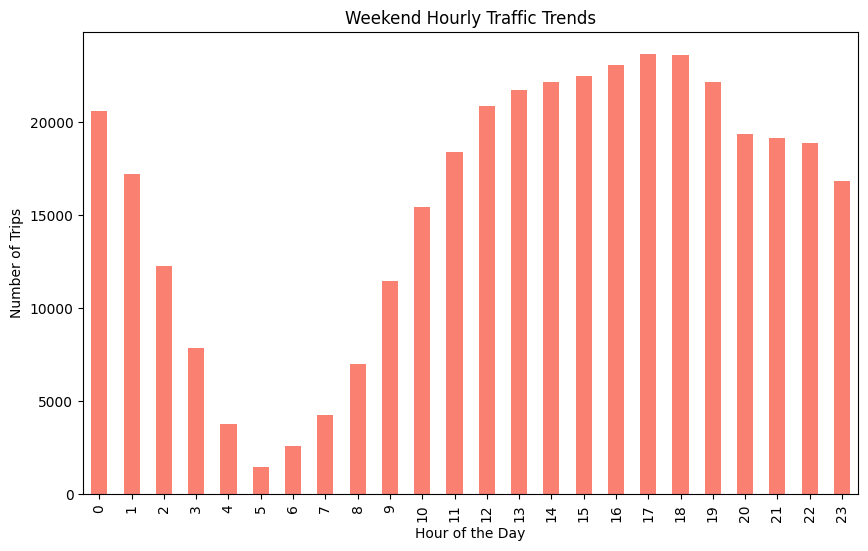

In [78]:
# Compare traffic trends for the week days and weekends

# Filter data for weekdays (Monday - Friday)
weekday_data = df_filtered[df_filtered['tpep_pickup_datetime'].dt.dayofweek.isin(range(0, 5))]

# Group by hour and count trips
weekday_hourly_trips = weekday_data.groupby(weekday_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Visualize weekday hourly trends
plt.figure(figsize=(10, 6))
weekday_hourly_trips.plot(kind='bar', color='skyblue')
plt.title('Weekday Hourly Traffic Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()

# Compare traffic trends for the weekends
weekend_data = df_filtered[df_filtered['tpep_pickup_datetime'].dt.dayofweek.isin([5, 6])]

# Group by hour and count trips
weekend_hourly_trips = weekend_data.groupby(weekend_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Visualize weekend hourly trends
plt.figure(figsize=(10, 6))
weekend_hourly_trips.plot(kind='bar', color='salmon')
plt.title('Weekend Hourly Traffic Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [79]:
# Weekday Pattern:
weekday_peak_hours = weekday_hourly_trips.idxmax() # Find hour with most trips
weekday_quiet_hours = weekday_hourly_trips.idxmin() # Find hour with least trips
print(f"Weekday peak hours are around {weekday_peak_hours}, quiet hours are around {weekday_quiet_hours}")

# Weekend Pattern:
weekend_peak_hours = weekend_hourly_trips.idxmax()
weekend_quiet_hours = weekend_hourly_trips.idxmin()
print(f"Weekend peak hours are around {weekend_peak_hours}, quiet hours are around {weekend_quiet_hours}")

Weekday peak hours are around 18, quiet hours are around 4
Weekend peak hours are around 17, quiet hours are around 5


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [82]:
# Find top 10 pickup and dropoff zones
# Group by pickup location ID and count the number of trips
top_pickup_zones = df_filtered.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the top 10 pickup zones
print("Top 10 Pickup Zones:\n", top_pickup_zones)


Top 10 Pickup Zones:
 PULocationID
237    69298
161    67273
132    63537
236    63200
162    52325
138    51414
142    48589
186    48289
230    44149
170    42906
Name: VendorID, dtype: int64


In [83]:
#Find top 10 dropoff zones

# Group by dropoff location ID and count the number of trips
top_dropoff_zones = df_filtered.groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the top 10 dropoff zones
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)


Top 10 Dropoff Zones:
 DOLocationID
236    66989
237    62006
161    54984
170    42891
239    42428
142    41185
162    41044
141    39450
230    39123
68     35857
Name: VendorID, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [84]:
#Find the ratio of pickups and dropoffs in each zone
# Group by pickup and dropoff locations
pickup_counts = df_filtered.groupby('PULocationID')['VendorID'].count().reset_index()
dropoff_counts = df_filtered.groupby('DOLocationID')['VendorID'].count().reset_index()

pickup_counts.rename(columns={'VendorID': 'pickup_count'}, inplace=True)
dropoff_counts.rename(columns={'VendorID': 'dropoff_count'}, inplace=True)

# Merge pickup and dropoff counts into a single DataFrame
zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Rename columns
zone_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Calculate medians for pickup_count and dropoff_count
median_pickup_count = zone_counts['pickup_count'].median()
median_dropoff_count = zone_counts['dropoff_count'].median()

# Fill NaN values with medians
zone_counts['pickup_count'].fillna(median_pickup_count, inplace=True)
zone_counts['dropoff_count'].fillna(median_dropoff_count, inplace=True)

# Calculate pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

# Handle division by zero (replace infinite values with NaN) - still needed
zone_counts.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the DataFrame with pickup/dropoff ratio
print(zone_counts[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
0           1.0         119.0         3955.0              0.030088
1           2.0           2.0          213.0              0.009390
2           NaN          23.0           52.0              0.442308
3           4.0        1405.0         5192.0              0.270609
4           NaN          23.0            5.0              4.600000
..          ...           ...            ...                   ...
255       261.0        6869.0         6414.0              1.070939
256       262.0       19157.0        23361.0              0.820042
257       263.0       27714.0        31139.0              0.890009
258       264.0       13198.0        13702.0              0.963217
259       265.0         548.0         4631.0              0.118333

[260 rows x 4 columns]


In [85]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Sort by pickup/dropoff ratio in descending order (highest ratios first)
top_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=False).head(10)

# Sort by pickup/dropoff ratio in ascending order (lowest ratios first)
# and filter out rows with NaN ratios for bottom 10
bottom_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio']).dropna().head(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios[['LocationID', 'pickup_dropoff_ratio']])
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios[['LocationID', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
      LocationID  pickup_dropoff_ratio
69         70.0             13.610753
198         NaN             11.500000
43          NaN              7.666667
126       132.0              4.633679
4           NaN              4.600000
181         NaN              4.600000
83          NaN              3.833333
29          NaN              3.285714
170         NaN              2.875000
132       138.0              2.868285

Bottom 10 Pickup/Dropoff Ratios:
      LocationID  pickup_dropoff_ratio
221       227.0              0.006536
199       205.0              0.006849
251       257.0              0.011041
50         51.0              0.012658
159       165.0              0.013158
13         14.0              0.013643
168       174.0              0.015152
17         18.0              0.016129
143       149.0              0.016393
248       254.0              0.016393


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [86]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11 PM to 5 AM)
night_trips = df_filtered[
    (df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5)
]

# Find top 10 pickup zones during night hours
night_pickups = night_trips.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Find top 10 dropoff zones during night hours
night_dropoffs = night_trips.groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Pickup Zones during Night Hours:\n", night_pickups)
print("\nTop 10 Dropoff Zones during Night Hours:\n", night_dropoffs)

Top 10 Pickup Zones during Night Hours:
 PULocationID
79     12627
249    10346
132     8772
148     7889
48      7572
114     7209
230     5575
186     4831
164     4653
138     4650
Name: VendorID, dtype: int64

Top 10 Dropoff Zones during Night Hours:
 DOLocationID
79     6674
48     4963
170    4885
107    4754
141    4338
68     4264
263    4145
249    4079
239    3640
229    3571
Name: VendorID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [87]:
# Filter for night hours (11 PM to 5 AM)

night_trips = df_filtered[
    (df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5)
]

# Calculate nighttime revenue
night_revenue = night_trips['total_amount'].sum()

# Calculate daytime revenue
day_trips = df_filtered[
    ~((df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5))
]
day_revenue = day_trips['total_amount'].sum()

# Calculate revenue share
total_revenue = night_revenue + day_revenue
night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

print(f"Nighttime Revenue Share: {night_share:.2%}")
print(f"Daytime Revenue Share: {day_share:.2%}")


Nighttime Revenue Share: 11.36%
Daytime Revenue Share: 88.64%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [91]:
# Analyse the fare per mile per passenger for different passenger counts

fare_per_mile_per_passenger = df.groupby('passenger_count').apply(
    lambda group: (group['fare_amount'].sum() / group['trip_distance'].sum()) / group['passenger_count'].iloc[0]).reset_index(name='fare_per_mile_per_passenger')
print(fare_per_mile_per_passenger)


   passenger_count  fare_per_mile_per_passenger
0              1.0                     0.000041
1              2.0                     0.000019
2              3.0                     0.000013
3              4.0                     0.000010
4              5.0                     0.000008


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

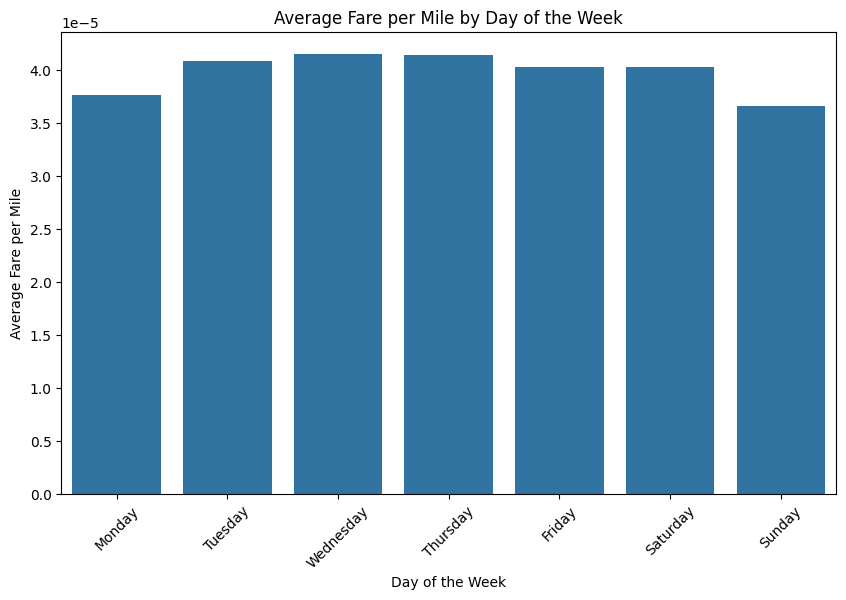

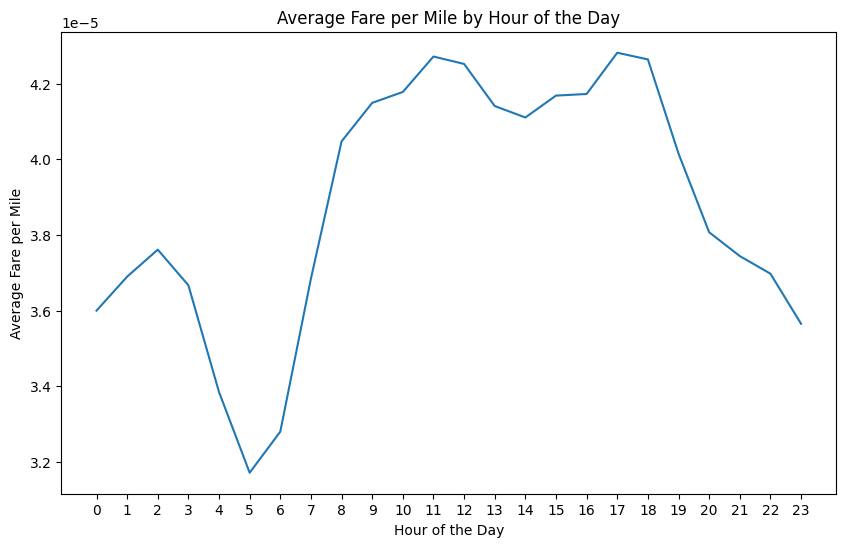

In [92]:
# Compare the average fare per mile for different days and for different times of the day
day_of_week_fares = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.dayofweek)[['fare_amount', 'trip_distance']].sum()
day_of_week_fares['fare_per_mile'] = day_of_week_fares['fare_amount'] / day_of_week_fares['trip_distance']

# Map day numbers to day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_fares.index = day_of_week_fares.index.map(lambda x: days[x])

# Visualize average fare per mile for different days
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_fares.index, y=day_of_week_fares['fare_per_mile'])
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.show()

# Group by hour of the day and calculate average fare per mile
hourly_fares = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.hour)[['fare_amount', 'trip_distance']].sum()
hourly_fares['fare_per_mile'] = hourly_fares['fare_amount'] / hourly_fares['trip_distance']

# Visualize average fare per mile for different hours
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_fares.index, y=hourly_fares['fare_per_mile'])
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(24))
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

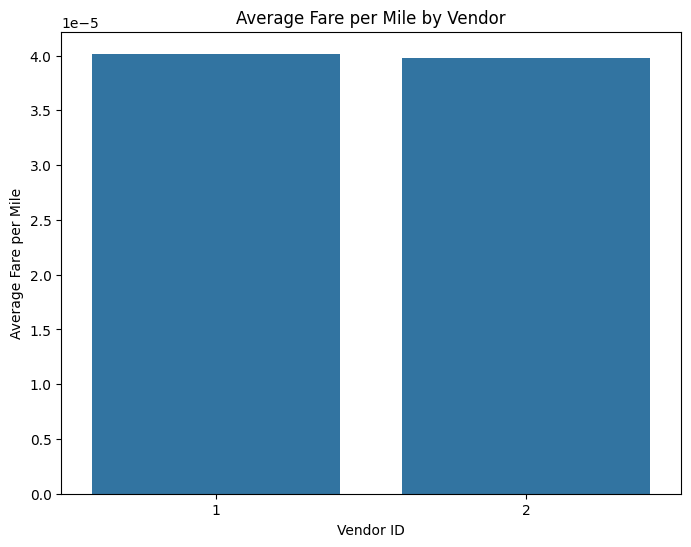

In [94]:
# Compare fare per mile for different vendors

vendor_fares = df_filtered.groupby('VendorID').apply(lambda x: x['fare_amount'].sum() / x['trip_distance'].sum() if x['trip_distance'].sum() != 0 else 0).reset_index(name='fare_per_mile')


# Visualize fare per mile for different vendors
plt.figure(figsize=(8, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=vendor_fares)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


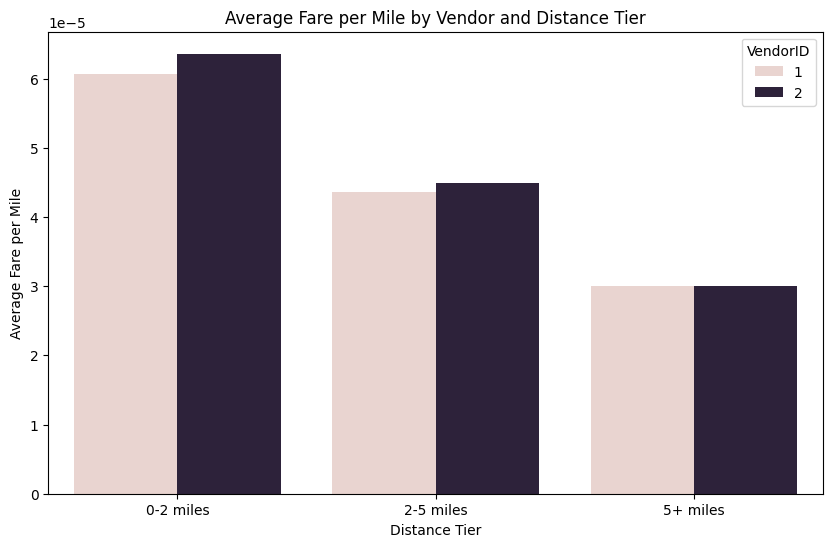

In [95]:
# Defining distance tiers

def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Apply the distance_tier function to create a new 'distance_tier' column
df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

# Group by vendor ID and distance tier, then calculate average fare per mile
tiered_fares = df_filtered.groupby(['VendorID', 'distance_tier'])[['fare_amount', 'trip_distance']].sum().reset_index()
tiered_fares['fare_per_mile'] = tiered_fares['fare_amount'] / tiered_fares['trip_distance']

# Visualize the tiered fares
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=tiered_fares)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip Percentage by Distance Tier:
 distance_tier
0-2 miles    2.240680e+06
2-5 miles    2.171180e+06
5+ miles     2.160951e+06
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
 passenger_count
1.0    2.207545e+06
2.0    2.208911e+06
3.0    2.204418e+06
4.0    2.226058e+06
5.0    2.208932e+06
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour:
 tpep_pickup_datetime
0     2.171812e+06
1     2.174600e+06
2     2.176362e+06
3     2.182845e+06
4     2.228922e+06
5     2.187419e+06
6     2.174151e+06
7     2.178756e+06
8     2.192028e+06
9     2.221866e+06
10    2.242582e+06
11    2.249378e+06
12    2.246494e+06
13    2.248915e+06
14    2.241345e+06
15    2.226759e+06
16    2.200631e+06
17    2.186922e+06
18    2.185707e+06
19    2.175156e+06
20    2.203085e+06
21    2.208122e+06
22    2.199339e+06
23    2.183515e+06
Name: tip_percentage, dtype: float64


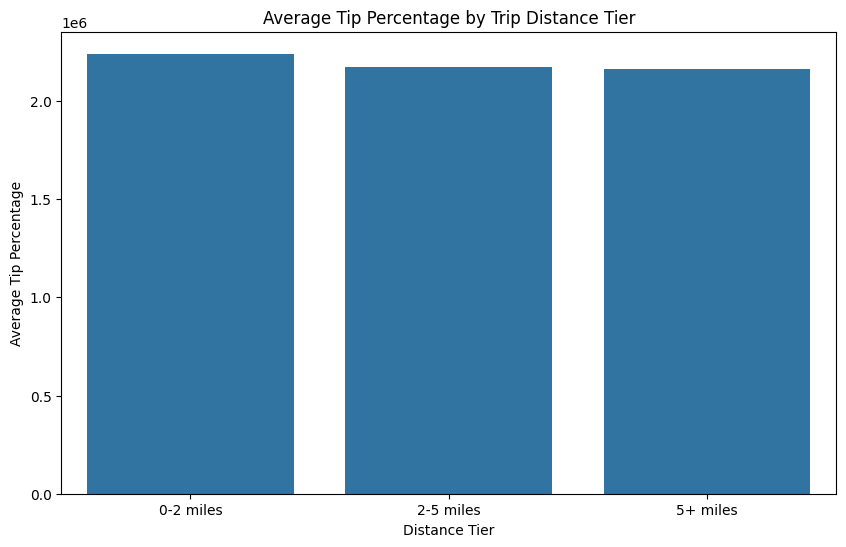

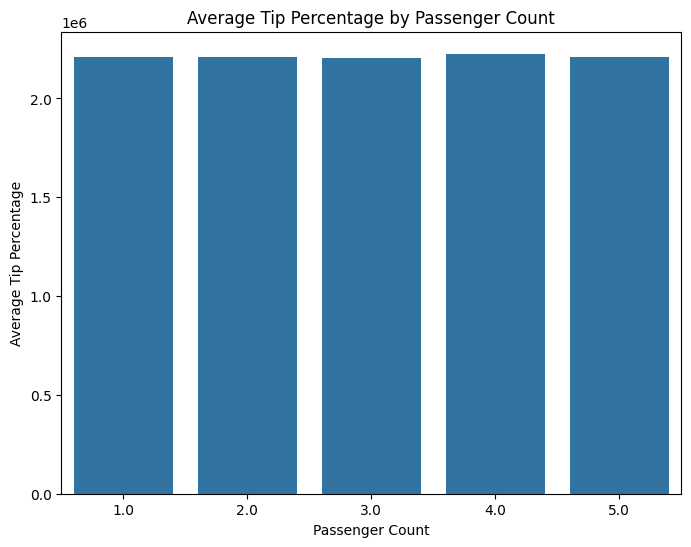

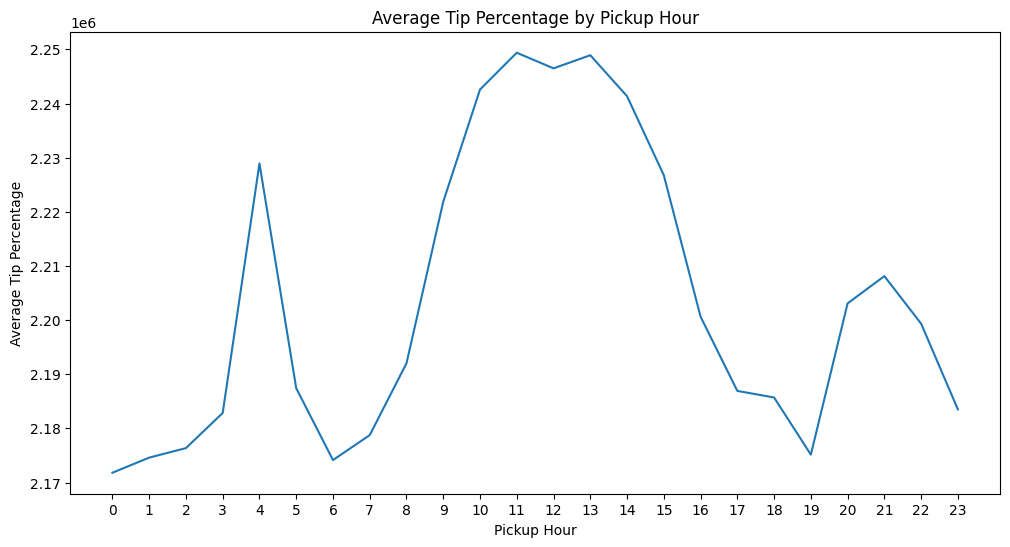

In [96]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Group by trip distance and calculate average tip percentage
tip_by_distance = df_filtered.groupby('distance_tier')['tip_percentage'].mean()

# Group by passenger count and calculate average tip percentage
tip_by_passenger_count = df_filtered.groupby('passenger_count')['tip_percentage'].mean()

# Group by pickup hour and calculate average tip percentage
tip_by_pickup_hour = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean()

# Print the results
print("Average Tip Percentage by Distance Tier:\n", tip_by_distance)
print("\nAverage Tip Percentage by Passenger Count:\n", tip_by_passenger_count)
print("\nAverage Tip Percentage by Pickup Hour:\n", tip_by_pickup_hour)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values)
plt.title('Average Tip Percentage by Trip Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=tip_by_passenger_count.index, y=tip_by_passenger_count.values)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=tip_by_pickup_hour.index, y=tip_by_pickup_hour.values)
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(24))
plt.show()

# Further analysis to identify factors leading to low tip percentages
low_tip_threshold = 5  # Define a threshold for low tip percentage
low_tip_trips = df_filtered[df_filtered['tip_percentage'] < low_tip_threshold]

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [97]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Filter trips into two groups
low_tip_trips = df_filtered[df_filtered['tip_percentage'] < 10]
high_tip_trips = df_filtered[df_filtered['tip_percentage'] > 25]


# Compare the two groups (example: average trip distance)
# Handle NaN values for low tip trips

# Check if all values in 'trip_distance' are NaN for low_tip_trips
if low_tip_trips['trip_distance'].isnull().all():
    avg_distance_low_tip = 0  # Assign 0 if all values are NaN
else:
    avg_distance_low_tip = low_tip_trips['trip_distance'].min() #use min instead of mean to get a valid value.

avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"Average distance for low tip trips: {avg_distance_low_tip}")
print(f"Average distance for high tip trips: {avg_distance_high_tip}")

Average distance for low tip trips: 0
Average distance for high tip trips: 3.408280420796235


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

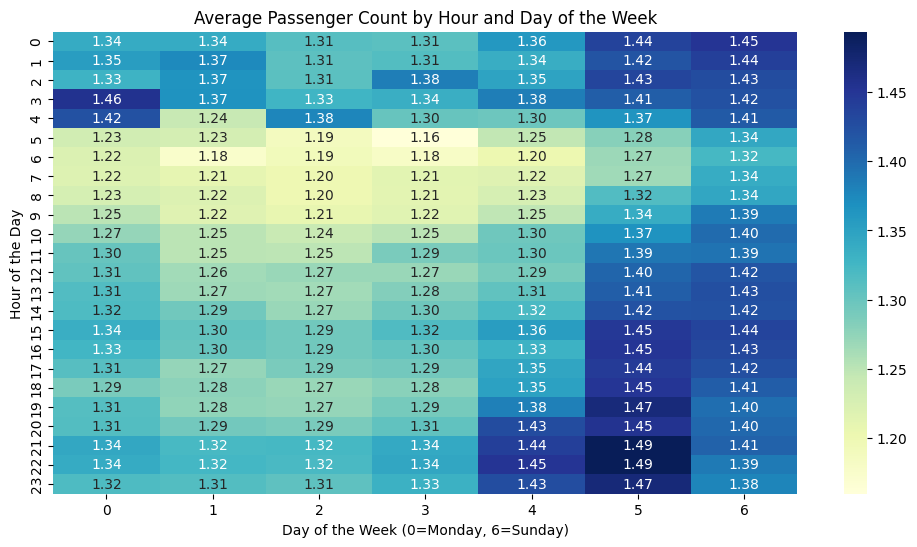

In [98]:
# See how passenger count varies across hours and days

df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_dayofweek'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 2. Group by hour and day of the week, then calculate average passenger count
passenger_counts = df_filtered.groupby(['pickup_hour', 'pickup_dayofweek'])['passenger_count'].mean().reset_index()

# 3. Visualize the results using a heatmap
plt.figure(figsize=(12, 6))
# Use keyword arguments for index, columns, and values
sns.heatmap(passenger_counts.pivot(index='pickup_hour', columns='pickup_dayofweek', values='passenger_count'),
            cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Average Passenger Count by Zone:
      PULocationID  avg_passengers
0               1        1.596639
1               2        1.000000
2               4        1.403559
3               6        2.000000
4               7        1.275093
..            ...             ...
232           261        1.444169
233           262        1.288302
234           263        1.300787
235           264        1.296333
236           265        1.525547

[237 rows x 2 columns]


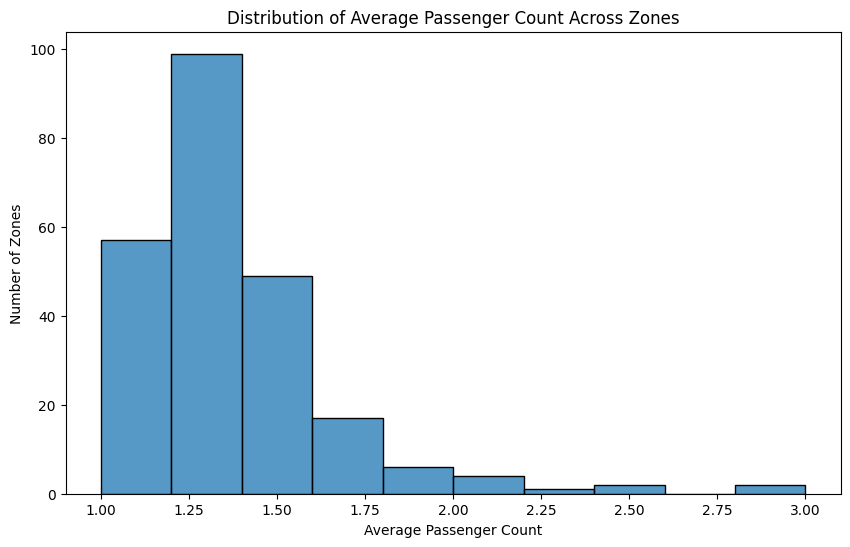

In [99]:
# How does passenger count vary across zones
passenger_count_by_zone = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Rename columns for clarity
passenger_count_by_zone.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)

# Display the results
print("Average Passenger Count by Zone:\n", passenger_count_by_zone)

# Visualize the distribution using a histogram or bar plot
plt.figure(figsize=(10, 6))
sns.histplot(passenger_count_by_zone['avg_passengers'], bins=10)
plt.title('Distribution of Average Passenger Count Across Zones')
plt.xlabel('Average Passenger Count')
plt.ylabel('Number of Zones')
plt.show()


In [101]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')

zones_with_trips = pd.merge(df_filtered, zones[['LocationID', 'zone', 'borough', 'geometry']],
                            left_on='PULocationID', right_on='LocationID', how='left')

zones_with_trips = gpd.GeoDataFrame(zones_with_trips, geometry='geometry')


avg_passenger_count = zones_with_trips.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)


zones_with_trips = zones_with_trips.merge(avg_passenger_count, on='PULocationID', how='left')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [103]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'airport_fee']


surcharge_frequency = df_filtered[surcharge_cols].apply(lambda col: (col > 0).sum() / len(df))

print("Surcharge Frequency:")
print(surcharge_frequency)


Surcharge Frequency:
extra                    0.491922
mta_tax                  0.768419
improvement_surcharge    0.774256
tolls_amount             0.062876
congestion_surcharge     0.733842
airport_fee              0.063802
dtype: float64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Demand Based Dispatching
# Dispatch more taxis to high-demand areas like Midtown Manhattan and the Upper East Side, especially during weekday rush hours (7-9 AM, 4-7 PM). This can reduce wait times for passengers in those areas.
# Increase the taxi fleet size during the busiest month of the year to meet the increased demand.
# Dispatch more taxis to zones like Greenwich Village and the East Village during late evening and early morning hours on weekends, as those are areas where you identified more trips during those times.
# There is high demand for pickups from LaGuardia and John F. Kennedy Airports and address this by dispatching more cabs to these locations during busy travel periods.

Route Optimization
# Focus on improving travel time to and from airports to and from airports




**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# During off-peak hours, shift some cabs from high-demand zones to areas with lower but consistent demand
# Increase the overall cab fleet size on Fridays to accommodate higher demand
# Allocate a dedicated fleet or prioritize dispatching to airports during peak travel times
# On weekdays, focus on business districts and transportation hubs during morning and evening commutes
# On weekends, shift cabs towards entertainment areas, especially during the early morning hours



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#  Implement surge pricing or dynamic pricing during peak hours (5 PM to 6 PM)
# Implement a premium pricing model or a flat fee for airport rides during peak travel times (6-8 AM and 4-6 PM)
